<ipython-input-1-c79add5b3a3b>:8: RuntimeWarning: overflow encountered in exp
  return a * (1 - np.exp(-b * t))


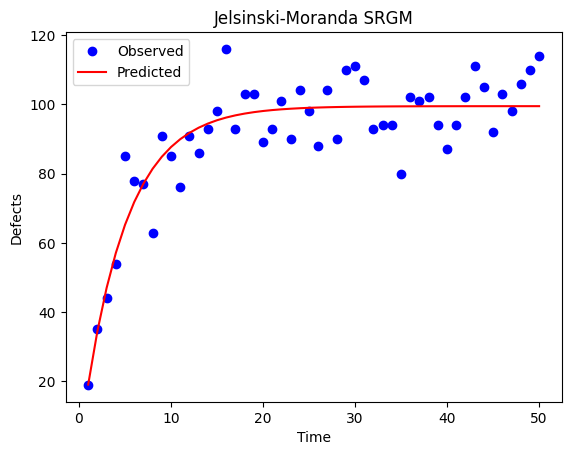

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the Jelsinski-Moranda SRGM function
def jelsinski_moranda(t, a, b):
    return a * (1 - np.exp(-b * t))

# Generate example dataset
np.random.seed(0)
t = np.arange(1, 51)  # Time intervals
y_true = jelsinski_moranda(t, 100, 0.2)  # True values
y_observed = np.random.poisson(y_true)  # Observed values with Poisson noise

# Fit the Jelsinski-Moranda SRGM to the observed data
params, _ = curve_fit(jelsinski_moranda, t, y_observed)

# Generate predictions using the fitted parameters
y_pred = jelsinski_moranda(t, *params)

# Create a DataFrame with the dataset
df = pd.DataFrame({'Time': t, 'Observed': y_observed, 'Predicted': y_pred})

# Save the dataset to a CSV file
df.to_csv('srgm_dataset.csv', index=False)

# Plot the observed and predicted values
plt.plot(t, y_observed, 'bo', label='Observed')
plt.plot(t, y_pred, 'r-', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Defects')
plt.title('Jelsinski-Moranda SRGM')
plt.legend()
plt.show()


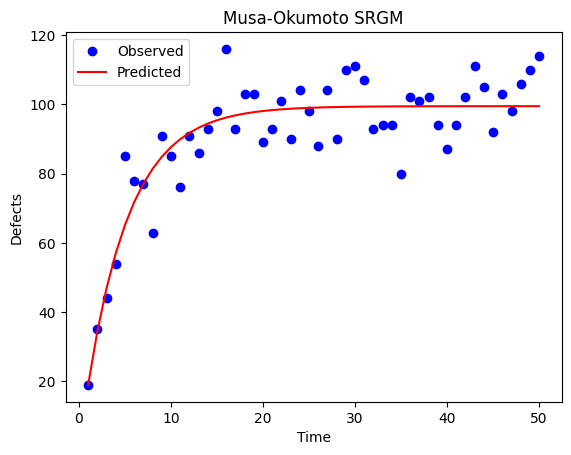

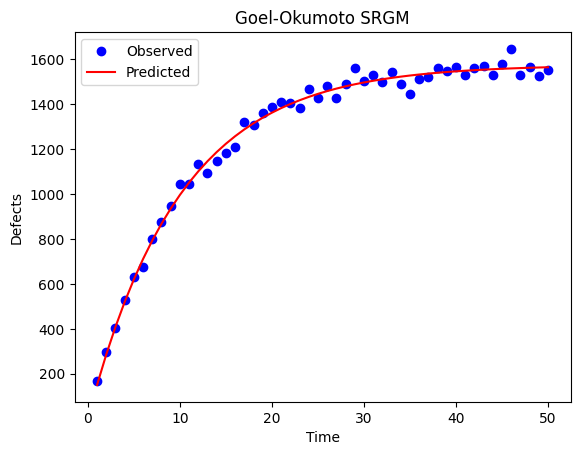

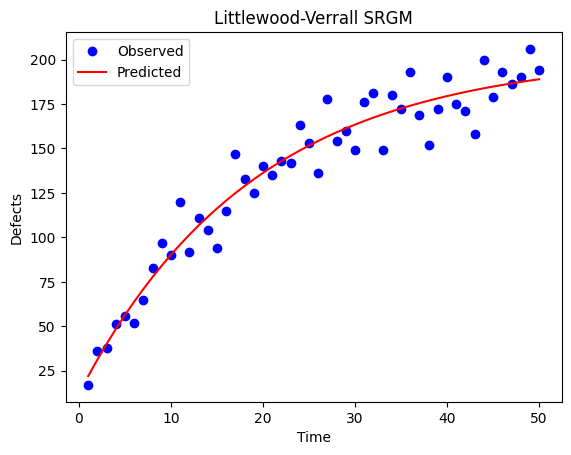

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Musa-Okumoto SRGM function
def musa_okumoto(t, a, b):
    return a * (1 - np.exp(-b * t))

# Goel-Okumoto SRGM function
def goel_okumoto(t, a, b):
    return a * (1 - np.exp(-b * t)) / (1 - np.exp(-b))

# Littlewood-Verrall SRGM function
def littlewood_verrall(t, a, b, c):
    return a * (1 - np.exp(-b * t)) + c

# Generate example dataset
np.random.seed(0)
t = np.arange(1, 51)  # Time intervals
y_true_musa_okumoto = musa_okumoto(t, 100, 0.2)  # Musa-Okumoto true values
y_true_goel_okumoto = goel_okumoto(t, 150, 0.1)  # Goel-Okumoto true values
y_true_littlewood_verrall = littlewood_verrall(t, 200, 0.05, 10)  # Littlewood-Verrall true values

y_observed_musa_okumoto = np.random.poisson(y_true_musa_okumoto)  # Observed values for Musa-Okumoto
y_observed_goel_okumoto = np.random.poisson(y_true_goel_okumoto)  # Observed values for Goel-Okumoto
y_observed_littlewood_verrall = np.random.poisson(y_true_littlewood_verrall)  # Observed values for Littlewood-Verrall

# Set parameter bounds
param_bounds_musa_okumoto = ([0, 0], [np.inf, np.inf])
param_bounds_goel_okumoto = ([0, 0], [np.inf, np.inf])
param_bounds_littlewood_verrall = ([0, 0, -np.inf], [np.inf, np.inf, np.inf])

# Fit the Musa-Okumoto SRGM to the observed data
params_musa_okumoto, _ = curve_fit(musa_okumoto, t, y_observed_musa_okumoto, bounds=param_bounds_musa_okumoto)

# Fit the Goel-Okumoto SRGM to the observed data
params_goel_okumoto, _ = curve_fit(goel_okumoto, t, y_observed_goel_okumoto, bounds=param_bounds_goel_okumoto)

# Fit the Littlewood-Verrall SRGM to the observed data
params_littlewood_verrall, _ = curve_fit(littlewood_verrall, t, y_observed_littlewood_verrall, bounds=param_bounds_littlewood_verrall)

# Generate predictions using the fitted parameters
y_pred_musa_okumoto = musa_okumoto(t, *params_musa_okumoto)
y_pred_goel_okumoto = goel_okumoto(t, *params_goel_okumoto)
y_pred_littlewood_verrall = littlewood_verrall(t, *params_littlewood_verrall)

# Create DataFrames with the datasets
df_musa_okumoto = pd.DataFrame({'Time': t, 'Observed': y_observed_musa_okumoto, 'Predicted': y_pred_musa_okumoto})
df_goel_okumoto = pd.DataFrame({'Time': t, 'Observed': y_observed_goel_okumoto, 'Predicted': y_pred_goel_okumoto})
df_littlewood_verrall = pd.DataFrame({'Time': t, 'Observed': y_observed_littlewood_verrall, 'Predicted': y_pred_littlewood_verrall})

# Save the datasets to CSV files
df_musa_okumoto.to_csv('musa_okumoto_dataset.csv', index=False)
df_goel_okumoto.to_csv('goel_okumoto_dataset.csv', index=False)
df_littlewood_verrall.to_csv('littlewood_verrall_dataset.csv', index=False)

# Plot the observed and predicted values for Musa-Okumoto
plt.plot(t, y_observed_musa_okumoto, 'bo', label='Observed')
plt.plot(t, y_pred_musa_okumoto, 'r-', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Defects')
plt.title('Musa-Okumoto SRGM')
plt.legend()
plt.show()

# Plot the observed and predicted values for Goel-Okumoto
plt.plot(t, y_observed_goel_okumoto, 'bo', label='Observed')
plt.plot(t, y_pred_goel_okumoto, 'r-', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Defects')
plt.title('Goel-Okumoto SRGM')
plt.legend()
plt.show()

# Plot the observed and predicted values for Littlewood-Verrall
plt.plot(t, y_observed_littlewood_verrall, 'bo', label='Observed')
plt.plot(t, y_pred_littlewood_verrall, 'r-', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Defects')
plt.title('Littlewood-Verrall SRGM')
plt.legend()
plt.show()
